In [1]:
import numpy as np
#np.set_printoptions(precision=8, suppress=True)
np.set_printoptions(suppress=True)
np.set_printoptions(suppress=True, formatter={'float_kind': lambda x: f'{x:.5f}'})


log_space = np.logspace(np.log10(2), np.log10(100), 10).astype(int)
print(log_space)
log_space = np.logspace(np.log10(2), np.log10(100), 11)#.astype(int)
log_space = log_space/log_space.max()
log_space = log_space.round(2)
print(log_space)

[  2   3   4   7  11  17  27  41  64 100]
[0.02000 0.03000 0.04000 0.06000 0.10000 0.14000 0.21000 0.31000 0.46000
 0.68000 1.00000]


In [2]:
print(f'Log space values:\n{log_space}')

Log space values:
[0.02000 0.03000 0.04000 0.06000 0.10000 0.14000 0.21000 0.31000 0.46000
 0.68000 1.00000]


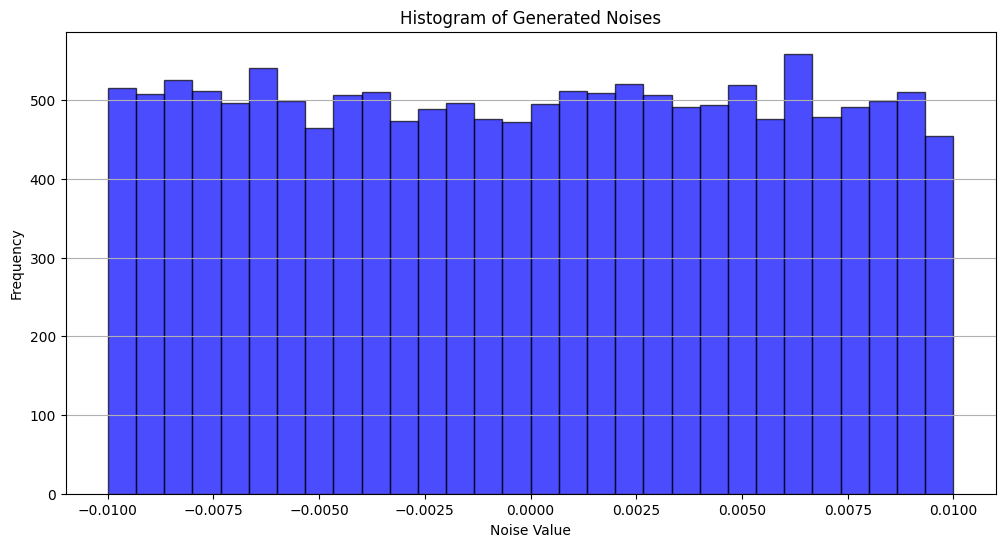

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

num = 5
in_dim = 50
out_dim = 50
noise_scale = 0.1

noises = (torch.rand(num+1, in_dim, out_dim) - 1/2) * noise_scale / num

# Convert to numpy for plotting
noises_np = noises.numpy()

# Flatten the noise for bar plotting
noises_flat = noises_np.flatten()

# Create an array for the x-axis
x = np.arange(len(noises_flat))

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(noises_flat, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Generated Noises')
plt.xlabel('Noise Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [4]:

num = 5
in_dim = 50
out_dim = 50
noise_scale = 0.1

val = noise_scale / 2*num
print(val)



0.25


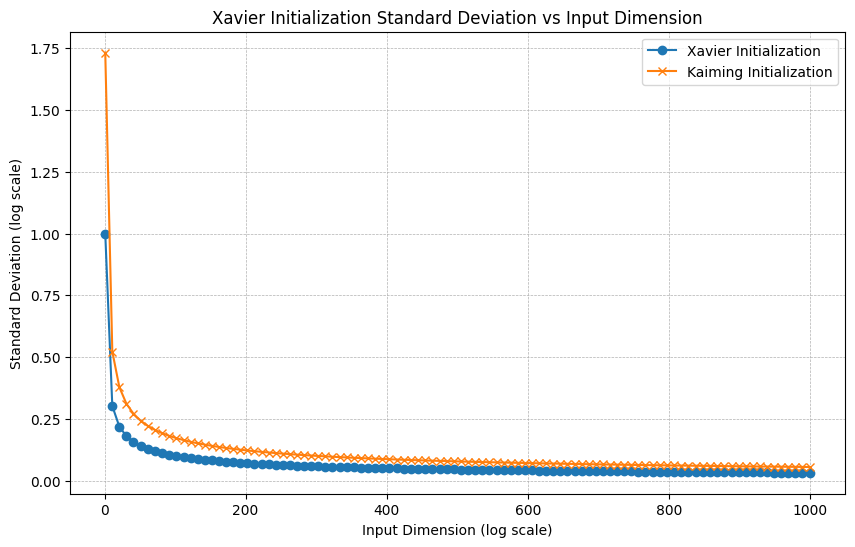

In [5]:
import numpy as np
import matplotlib.pyplot as plt


in_dims = np.linspace(1, 1000, 100).astype(int)
xavier = np.sqrt(1.0 / in_dims)
kaiming = np.sqrt(3.0 / in_dims)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(in_dims, xavier, label='Xavier Initialization', marker='o')
ax.plot(in_dims, kaiming, label='Kaiming Initialization', marker='x')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Input Dimension (log scale)')
ax.set_ylabel('Standard Deviation (log scale)')
ax.set_title('Xavier Initialization Standard Deviation vs Input Dimension')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_summed_violins(model, title, mode="act", sample_size=100):
    data = []
    for layer_index, (act_fun, acts, preacts, postacts, postsplines) in enumerate(zip(model.act_fun, model.acts, model.spline_preacts, model.spline_postacts, model.spline_postsplines)):
        
        grid_range = act_fun.grid_range
        print(layer_index, grid_range)

        coef = act_fun.coef

        dist_np = None  # Changed from acts_np to dist_np
        if mode == "act":
            dist_np = coef.cpu().detach().numpy()
            dist_np = dist_np.sum(axis=2, keepdims=True)

        # Ensure dist_np is a 1D array
        dist_np = dist_np.flatten()

        # Sample a subset of activations if there are more than sample_size
        if len(dist_np) > sample_size:
            sampled_acts = np.random.choice(dist_np, sample_size, replace=False)
        else:
            sampled_acts = dist_np  # Use all if less than sample_size
        
        # Append layer index and sampled activations to the data list
        data.extend([(layer_index, act) for act in sampled_acts])

    # Convert the data into a DataFrame
    df = pd.DataFrame(data, columns=['Layer', 'Activation'])

    plt.figure(figsize=(12, 6))

    # Create a violin plot
    sns.violinplot(data=df, x="Layer", y="Activation", inner="quart")

    # Adding labels and title
    plt.title(title)
    plt.xlabel('Layer')
    plt.ylabel(f'{mode}')
    plt.tight_layout()

    # Show plot
    #plt.show()
    return plt.gcf()

In [ ]:
import numpy as np
# Assuming args.hidden_depth is the number of hidden layers
# and args.hidden_width is not needed in this case
input_dim = 2
output_dim = 2
hidden_depth = 5
# Create a list of widths that interpolate from input_dim to output_dim
if hidden_depth > 0:
    # Generate linearly spaced values between input_dim and output_dim
    hidden_widths = [int(x) for x in np.linspace(input_dim, output_dim, hidden_depth + 2)[1:-1]]
else:
    hidden_widths = []
# Combine input_dim, hidden widths, and output_dim
width = [input_dim, *hidden_widths, output_dim]
print(f"Width of each layer: {width}")